In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
np.random.seed(10)

In [2]:
class Spherical_shape_like():
    def __init__(self, feature_num=2, data_num=300, centre=(0, 0), r=(2, 4), noise=0.01, fill=False):
        def dumy_dataset(feature_num=None):
            return np.zeros((1, feature_num))
        self.fill = fill
        self.noise = noise
        self.feature_num = feature_num
        self.data_num = data_num
        self.dataset = dumy_dataset(feature_num)
        self.centre = centre
        self.r = r


    def __len__(self):
        return self.dataset.shape[0] - 1

    def make(self):
        if type(self.r) == tuple:
            len_r = len(self.r)
        else:
            len_r = 1
            self.r = [self.r] #For convenience
        if self.fill == False:
            for i in range(0, (int(self.data_num/len_r))):
                for r in self.r:
                    ''' r^2 = sqrt(x^2 + y^2)'''
                    x = np.random.uniform(low=-r, high=r)

                    y_sqr = r * r - x * x
                    if i % 2 == 0:
                        y = np.sqrt(y_sqr)
                    else :
                        y = -np.sqrt(y_sqr)
                    '''Adding gaussian noise and move the center of the data'''
                    x += (np.random.normal() * self.noise) + self.centre[0]
                    y += (np.random.normal() * self.noise) + self.centre[1]
                    self.dataset = np.append(self.dataset, np.array([[x, y]]), axis=0)
        else:
            for i in range(0, (int(self.data_num/len_r))):
                for r in self.r:
                    r_fill = r - np.random.normal(loc=r, scale=1)
                    x = np.random.uniform(low=-r_fill, high=r_fill)

                    y_sqr = r_fill * r_fill - x * x
                    if i % 2 == 0:
                        y = np.sqrt(y_sqr)
                    else:
                        y = -np.sqrt(y_sqr)
                    '''Adding gaussian noise and move the center of the data'''
                    x += (np.random.normal() * self.noise) + self.centre[0]
                    y += (np.random.normal() * self.noise) + self.centre[1]
                    self.dataset = np.append(self.dataset, np.array([[x, y]]), axis=0)

    def get_dataset(self):
        return self.dataset[1:] #Excluding redundant array

In [3]:
class Linear_dataset():
    def __init__(self, feature_num=2, data_num=300, centre=(0, 0), w=(2, 4), noise=0.01, range=(3, 5)):
        def dumy_dataset(feature_num=None):
            return np.zeros((1, feature_num))
        self.feature_num = feature_num
        self.data_num = data_num
        self.centre = centre
        self.weight = w
        self.noise = noise
        self.dataset = dumy_dataset(feature_num)
        self.range = range
        self.variance = None
        self.mean = None
    def make(self):
        if type(self.weight) == tuple:
            len_weight = len(self.weight)

            for i in range(0, (int(self.data_num/len_weight))):
                for w in self.weight:
                    '''first cluster'''
                    x = np.random.uniform(low=0, high=self.range[0])
                    y = x * self.weight[0]

                    '''Adding gaussian noise and move the center of the data'''
                    x += (np.random.normal() * self.noise) + self.centre[0]
                    y += (np.random.normal() * self.noise) + self.centre[1]
                    self.dataset = np.append(self.dataset, np.array([[x, y]]), axis=0)

                    '''second cluster'''
                    x = np.random.uniform(low=0, high=self.range[1])
                    y = x * self.weight[1]

                    '''Adding gaussian noise and move the center of the data'''
                    x += (np.random.normal() * self.noise) + self.centre[0]
                    y += (np.random.normal() * self.noise) + self.centre[1]
                    self.dataset = np.append(self.dataset, np.array([[x, y]]), axis=0)
        else:
            for i in range(0, (int(self.data_num))):
                '''first cluster'''
                x = np.random.uniform(low=0, high=self.range)
                y = x * self.weight

                '''Adding gaussian noise and move the center of the data'''
                x += (np.random.normal() * self.noise) + self.centre[0]
                y += (np.random.normal() * self.noise) + self.centre[1]
                self.dataset = np.append(self.dataset, np.array([[x, y]]), axis=0)
    def get_dataset(self):
        return self.dataset[1:] #Excluding redundant array

In [4]:
class Mixture_gaussian_blob():
    def __init__(self, mean=None, variance=None, weights=None, data_num=None, feature_num=None):
        self.mean = mean
        self.variance = variance
        self.data_num = data_num
        self.feature_num = feature_num
        self.weights = weights
    def make(self):
        data_num = self.data_num
        weights = self.weights
        centre_n = len(self.mean)
        mixed_gaussian = np.zeros((1, 2))
        for i in range(centre_n):
            random = (np.random.normal(self.mean[i], self.variance[i], (int(weights[i] * data_num), self.feature_num)))
            mixed_gaussian = np.append(mixed_gaussian, random, axis=0)
        return mixed_gaussian

In [5]:
def K_means(data, k):
    assinged = np.zeros(data.shape[0])
    cluster_means = np.zeros((k, data.shape[1]))
    cluster_datapoint_num = np.zeros((k)) - 1
    converge = 0

    check = 0
    '''init the centroids'''
    for i in range(0,k):
        for j in range(data.shape[1]):
            # cluster_means[i][0] = np.random.normal()
            # cluster_means[i][1] = np.random.normal()*2
            cluster_means[i][j] = np.random.normal() #when clustering artificial data
            # cluster_means[i][j] = np.random.uniform(low=0, high=255) #when clustering image
    while converge != k:
        check += 1
        for i in range(0, data.shape[0]):
            centroids = np.array([-1, np.amax(data) * 1000000])
            for j in range(0, k):
                mean = np.sqrt(np.sum(data[i]-cluster_means[j])**2)
                if mean < centroids[1]:
                    centroids[0] = j
                    centroids[1] = mean
            assinged[i] = centroids[0]
        for i in range(0, k):
            tmp = cluster_datapoint_num[i]
            ith_cluster_idx = np.where(assinged == i)
            cluster_datapoint_num[i] = len(ith_cluster_idx[0])
            if tmp == cluster_datapoint_num[i]:
                converge += 1
            # x_sum = 0
            # y_sum = 0
            sum = np.zeros((1, data.shape[1]))
            for j in ith_cluster_idx[0]:
                # x_sum += data[j][0]
                # y_sum += data[j][1]
                sum += data[j]
            # x_sum /= cluster_datapoint_num[i]
            # y_sum /= cluster_datapoint_num[i]
            sum /= cluster_datapoint_num[i]
            # cluster_means[i][0] = x_sum
            # cluster_means[i][1] = y_sum
            cluster_means[i] = sum
        if converge == k:
            return assinged
        else:
            converge = 0

In [6]:
def K_means_soft(data, k):
    assinged = np.zeros(data.shape[0])
    cluster_means = np.zeros((k, data.shape[1]))
    cluster_datapoint_num = np.zeros((k)) - 1
    responsibility = np.zeros((data.shape[0], data.shape[1]))
    converge = 0
    beta = 0.6
    check = 0
    '''init the centroids'''
    for i in range(0,k):
        cluster_means[i][0] = np.random.normal()
        cluster_means[i][1] = np.random.normal()

    while converge != k:
        check += 1
        for i in range(0, data.shape[0]):
            centroids = np.array([-1, np.amax(data) * 1000000])
            responsibility_tmp = np.zeros((k, data.shape[1]))
            for j in range(0, k):
                mean = np.sqrt((data[i][0]-cluster_means[j][0])**2 + (data[i][1]-cluster_means[j][1])**2)
                responsibility_tmp[j] = np.exp(-beta * ((data[i]-cluster_means[j])**2))
                if mean < centroids[1]:
                    centroids[0] = j
                    centroids[1] = mean

            assinged[i] = centroids[0]
            assigned_centroid = assinged[i]

            responsibility[i] = responsibility_tmp[int(assigned_centroid)]
        for i in range(0, k):
            tmp = cluster_datapoint_num[i]
            ith_cluster_idx = np.where(assinged == i)
            cluster_datapoint_num[i] = len(ith_cluster_idx[0])
            if tmp == cluster_datapoint_num[i]:
                converge += 1
            x_sum = 0
            y_sum = 0
            for j in ith_cluster_idx[0]:
                x_sum += data[j][0]
                y_sum += data[j][1]
            x_sum /= cluster_datapoint_num[i]
            y_sum /= cluster_datapoint_num[i]

            cluster_means[i][0] = x_sum
            cluster_means[i][1] = y_sum

        if converge == k:
            return assinged, responsibility
        else:
            converge = 0

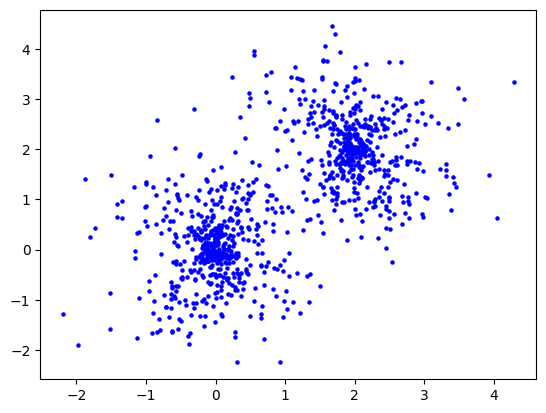

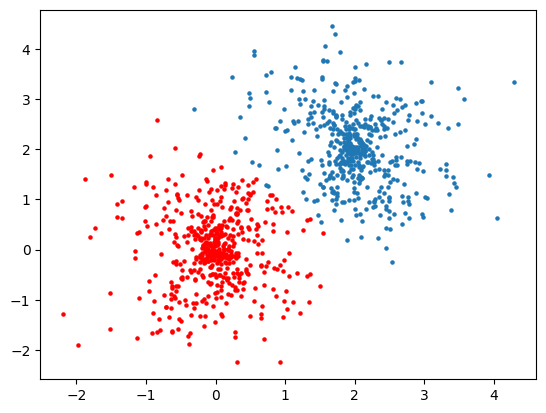

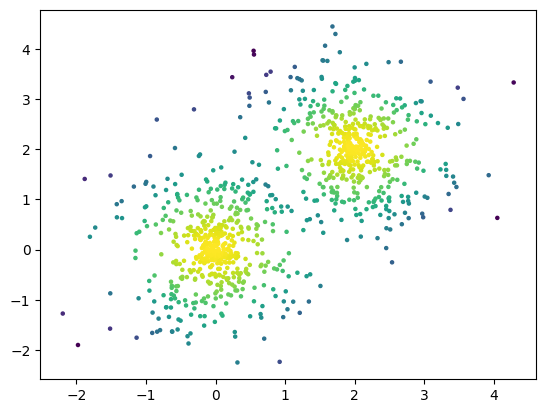

In [7]:
'''Balanced spherical data'''
DatasetA = Spherical_shape_like(data_num= 500, centre=(0, 0), r=3, noise=0.1, fill=True)
DatasetA.make()
DataA = DatasetA.get_dataset()

DatasetB = Spherical_shape_like(data_num= 500, centre=(2, 2), r=3, noise=0.1, fill=True)
DatasetB.make()
DataB = DatasetB.get_dataset()

plt.scatter(DataA[:, :1], DataA[:, 1:2], s=5, color='blue')
plt.scatter(DataB[:, :1], DataB[:, 1:2], s=5, color='blue')
plt.show()

Dataset_combined = DataA
Dataset_combined = np.append(Dataset_combined, DataB, axis=0)
np.random.shuffle(Dataset_combined)

asign = K_means(Dataset_combined, 2)

asign = asign.astype(bool)
C1, C2 = Dataset_combined[asign], Dataset_combined[~asign]
plt.scatter(C1[:, :1], C1[:, 1:2], s=5, color='red')
plt.scatter(C2[:, :1], C2[:, 1:2], s=5)
plt.show()

cluster, res = K_means_soft(Dataset_combined, 2)
asign = asign.astype(bool)
C1, C2 = Dataset_combined[asign], Dataset_combined[~asign]
r1, r2 = res[asign], res[~asign]

plt.scatter(C1[:, :1], C1[:, 1:2], c=np.sum(r1, axis=1), s=5)
plt.scatter(C2[:, :1], C2[:, 1:2], c=np.sum(r2, axis=1), s=5)
plt.show()

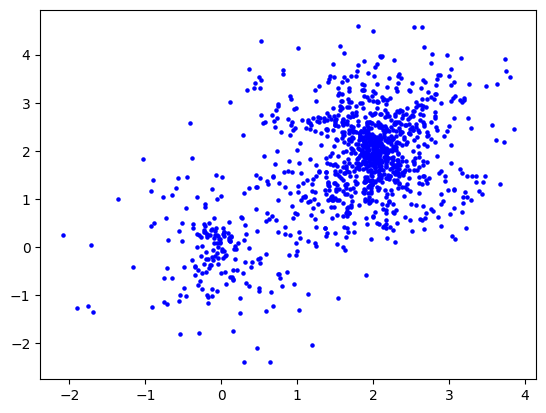

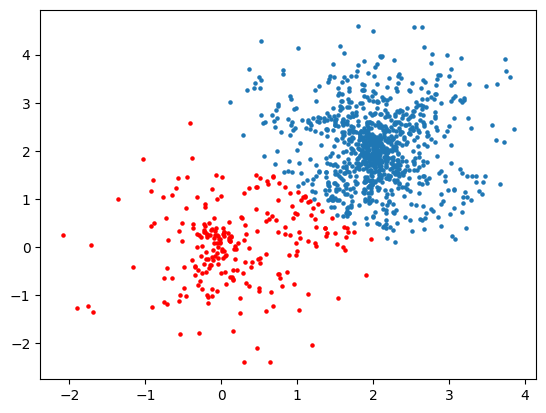

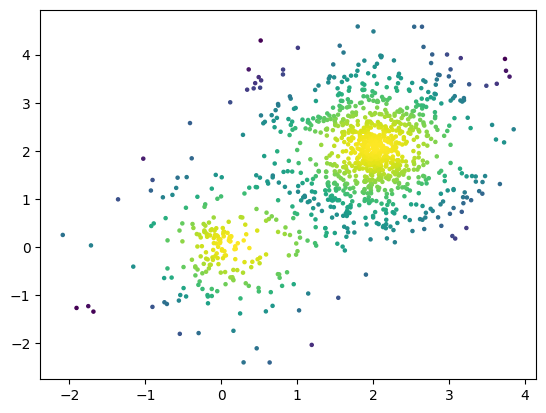

In [8]:
'''ImBalanced spherical data'''
DatasetA = Spherical_shape_like(data_num= 200, centre=(0, 0), r=3, noise=0.1, fill=True)
DatasetA.make()
DataA = DatasetA.get_dataset()

DatasetB = Spherical_shape_like(data_num= 1000, centre=(2, 2), r=3, noise=0.1, fill=True)
DatasetB.make()
DataB = DatasetB.get_dataset()

plt.scatter(DataA[:, :1], DataA[:, 1:2], s=5, color='blue')
plt.scatter(DataB[:, :1], DataB[:, 1:2], s=5, color='blue')
plt.show()

Dataset_combined = DataA
Dataset_combined = np.append(Dataset_combined, DataB, axis=0)
np.random.shuffle(Dataset_combined)

asign = K_means(Dataset_combined, 2)

asign = asign.astype(bool)
C1, C2 = Dataset_combined[asign], Dataset_combined[~asign]
plt.scatter(C1[:, :1], C1[:, 1:2], s=5, color='red')
plt.scatter(C2[:, :1], C2[:, 1:2], s=5)
plt.show()

cluster, res = K_means_soft(Dataset_combined, 2)
asign = asign.astype(bool)
C1, C2 = Dataset_combined[asign], Dataset_combined[~asign]
r1, r2 = res[asign], res[~asign]

plt.scatter(C1[:, :1], C1[:, 1:2], c=np.sum(r1, axis=1), s=5)
plt.scatter(C2[:, :1], C2[:, 1:2], c=np.sum(r2, axis=1), s=5)
plt.show()

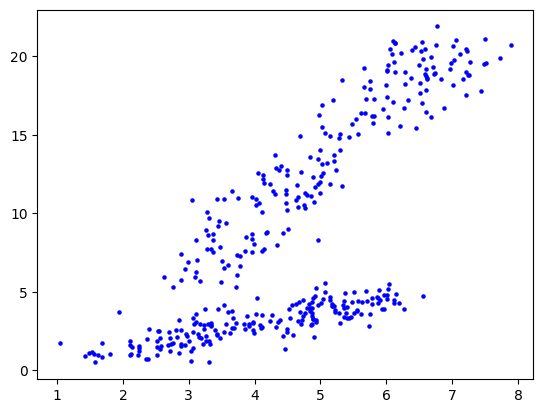

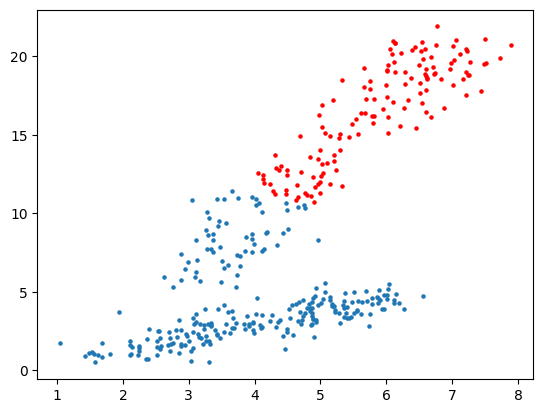

<ipython-input-6-81eca8b647e9>:41: RuntimeWarning: invalid value encountered in double_scalars
  x_sum /= cluster_datapoint_num[i]
<ipython-input-6-81eca8b647e9>:42: RuntimeWarning: invalid value encountered in double_scalars
  y_sum /= cluster_datapoint_num[i]


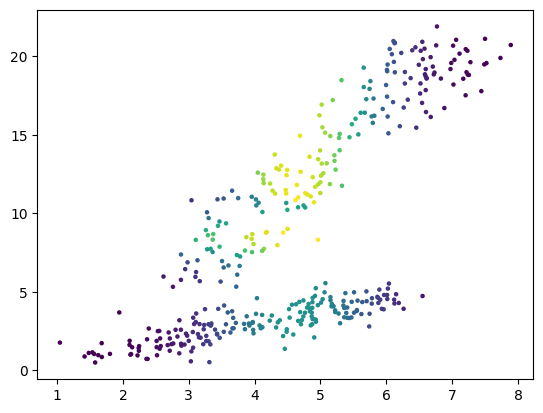

In [9]:
'''Balanced non-spherical data'''
DatasetA = Linear_dataset(data_num= 200, centre=(3, 5), w=4, noise=0.5, range=4)
DatasetA.make()
DataA = DatasetA.get_dataset()

DatasetB = Linear_dataset(data_num= 200, centre=(2, 1), w=1, noise=0.5, range=4)
DatasetB.make()
DataB = DatasetB.get_dataset()
plt.scatter(DataA[:, :1], DataA[:, 1:2], s=5, color='blue')
plt.scatter(DataB[:, :1], DataB[:, 1:2], s=5, color='blue')
plt.show()

Dataset_combined = DataA
Dataset_combined = np.append(Dataset_combined, DataB, axis=0)
np.random.shuffle(Dataset_combined)

asign = K_means(Dataset_combined, 2)

asign = asign.astype(bool)
C1, C2 = Dataset_combined[asign], Dataset_combined[~asign]
plt.scatter(C1[:, :1], C1[:, 1:2], s=5, color='red')
plt.scatter(C2[:, :1], C2[:, 1:2], s=5)
plt.show()

cluster, res = K_means_soft(Dataset_combined, 2)
asign = asign.astype(bool)
C1, C2 = Dataset_combined[asign], Dataset_combined[~asign]
r1, r2 = res[asign], res[~asign]

plt.scatter(C1[:, :1], C1[:, 1:2], c=np.sum(r1, axis=1), s=5)
plt.scatter(C2[:, :1], C2[:, 1:2], c=np.sum(r2, axis=1), s=5)
plt.show()

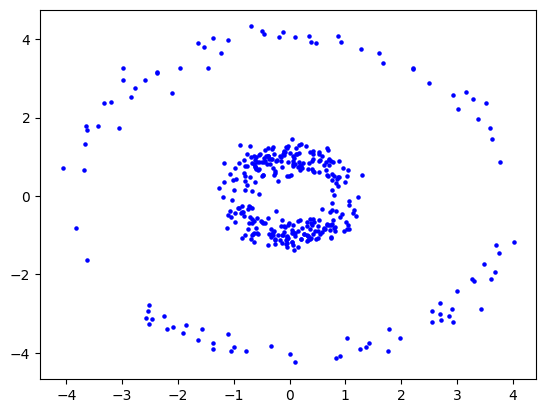

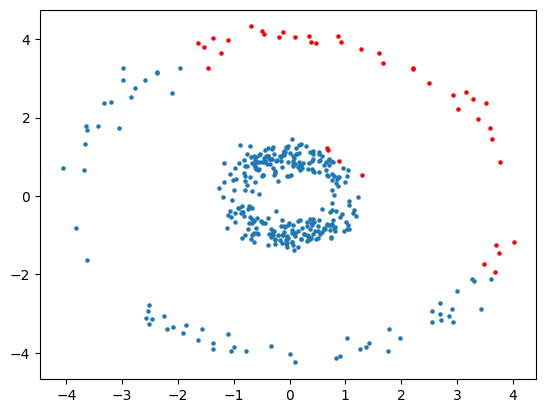

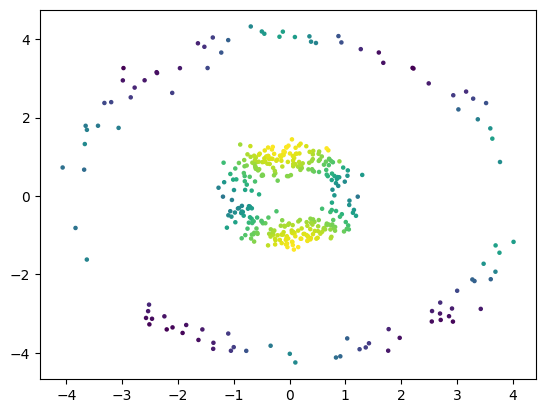

In [10]:
'''Balanced non-spherical data2'''
DatasetA = Spherical_shape_like(data_num= 100, centre=(0, 0), r=4, noise=0.2)
DatasetA.make()
DataA = DatasetA.get_dataset()

DatasetB = Spherical_shape_like(data_num= 300, centre=(0, 0), r=1, noise=0.2)
DatasetB.make()
DataB = DatasetB.get_dataset()

plt.scatter(DataA[:, :1], DataA[:, 1:2], s=5, color='blue')
plt.scatter(DataB[:, :1], DataB[:, 1:2], s=5, color='blue')
plt.show()

Dataset_combined = DataA
Dataset_combined = np.append(Dataset_combined, DataB, axis=0)
np.random.shuffle(Dataset_combined)

asign = K_means(Dataset_combined, 2)

asign = asign.astype(bool)
C1, C2 = Dataset_combined[asign], Dataset_combined[~asign]
plt.scatter(C1[:, :1], C1[:, 1:2], s=5, color='red')
plt.scatter(C2[:, :1], C2[:, 1:2], s=5)
plt.show()

cluster, res = K_means_soft(Dataset_combined, 2)
asign = asign.astype(bool)
C1, C2 = Dataset_combined[asign], Dataset_combined[~asign]
r1, r2 = res[asign], res[~asign]

plt.scatter(C1[:, :1], C1[:, 1:2], c=np.sum(r1, axis=1), s=5)
plt.scatter(C2[:, :1], C2[:, 1:2], c=np.sum(r2, axis=1), s=5)
plt.show()

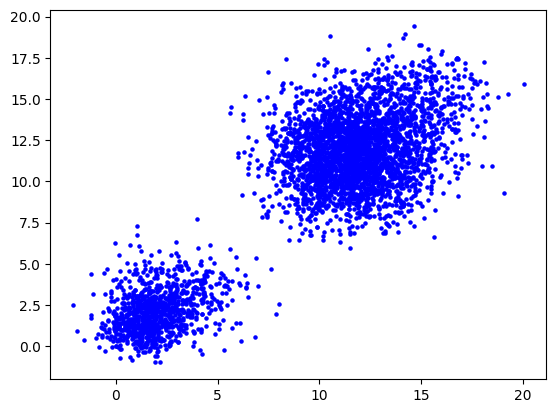

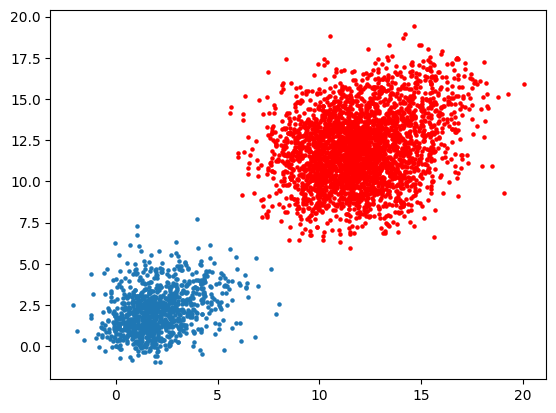

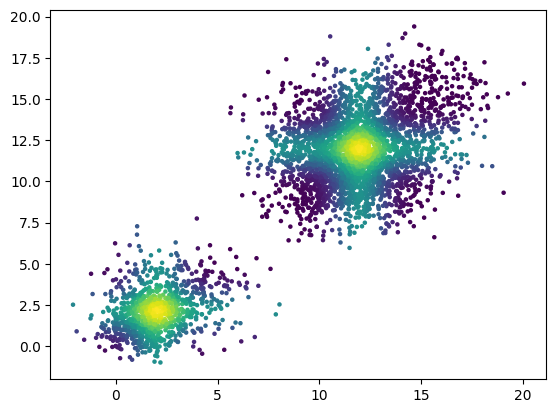

In [11]:
'''Balanced non-spherical data variance'''
DatasetA = Mixture_gaussian_blob([2, 3, 1], [1, 1.5, 0.8], [0.3, 0.4, 0.3], 1000, 2)
DataA = DatasetA.make()
DatasetB = Mixture_gaussian_blob([11, 15, 12], [1.7, 1.5, 2], [0.3, 0.1, 0.6], 3000, 2)
DataB = DatasetB.make()
plt.scatter(DataA[:, :1], DataA[:, 1:2], s=5, color='blue')
plt.scatter(DataB[:, :1], DataB[:, 1:2], s=5, color='blue')

plt.show()

Dataset_combined = DataA
Dataset_combined = np.append(Dataset_combined, DataB, axis=0)
np.random.shuffle(Dataset_combined)

asign = K_means(Dataset_combined, 2)

asign = asign.astype(bool)
C1, C2 = Dataset_combined[asign], Dataset_combined[~asign]
plt.scatter(C1[:, :1], C1[:, 1:2], s=5, color='red')
plt.scatter(C2[:, :1], C2[:, 1:2], s=5)
plt.show()

cluster, res = K_means_soft(Dataset_combined, 2)
asign = asign.astype(bool)
C1, C2 = Dataset_combined[asign], Dataset_combined[~asign]
r1, r2 = res[asign], res[~asign]

plt.scatter(C1[:, :1], C1[:, 1:2], c=np.sum(r1, axis=1), s=5)
plt.scatter(C2[:, :1], C2[:, 1:2], c=np.sum(r2, axis=1), s=5)
plt.show()

In [12]:
image = cv2.imread('musium.jpg')
plt.show()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.reshape((40000, 3))
asign = K_means(image, 5)

image[np.where(asign == 0)] = 80
image[np.where(asign == 1)] = 120
image[np.where(asign == 2)] = 160
image[np.where(asign == 3)] = 200
image[np.where(asign == 4)] = 240

image = image.reshape((200, 200, 3))
plt.imshow(image)
plt.show()

error: ignored

In [13]:
image = cv2.imread('Brasilia.jpg')
plt.show()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.reshape((40000, 3))
asign = K_means(image, 5)

image[np.where(asign == 0)] = 80
image[np.where(asign == 1)] = 120
image[np.where(asign == 2)] = 160
image[np.where(asign == 3)] = 200
image[np.where(asign == 4)] = 240

image = image.reshape((200, 200, 3))
plt.imshow(image)
plt.show()

error: ignored